# Logistic Regression

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
data=pd.read_csv("green_tech_data.csv")

In [5]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [7]:
data.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [9]:
print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


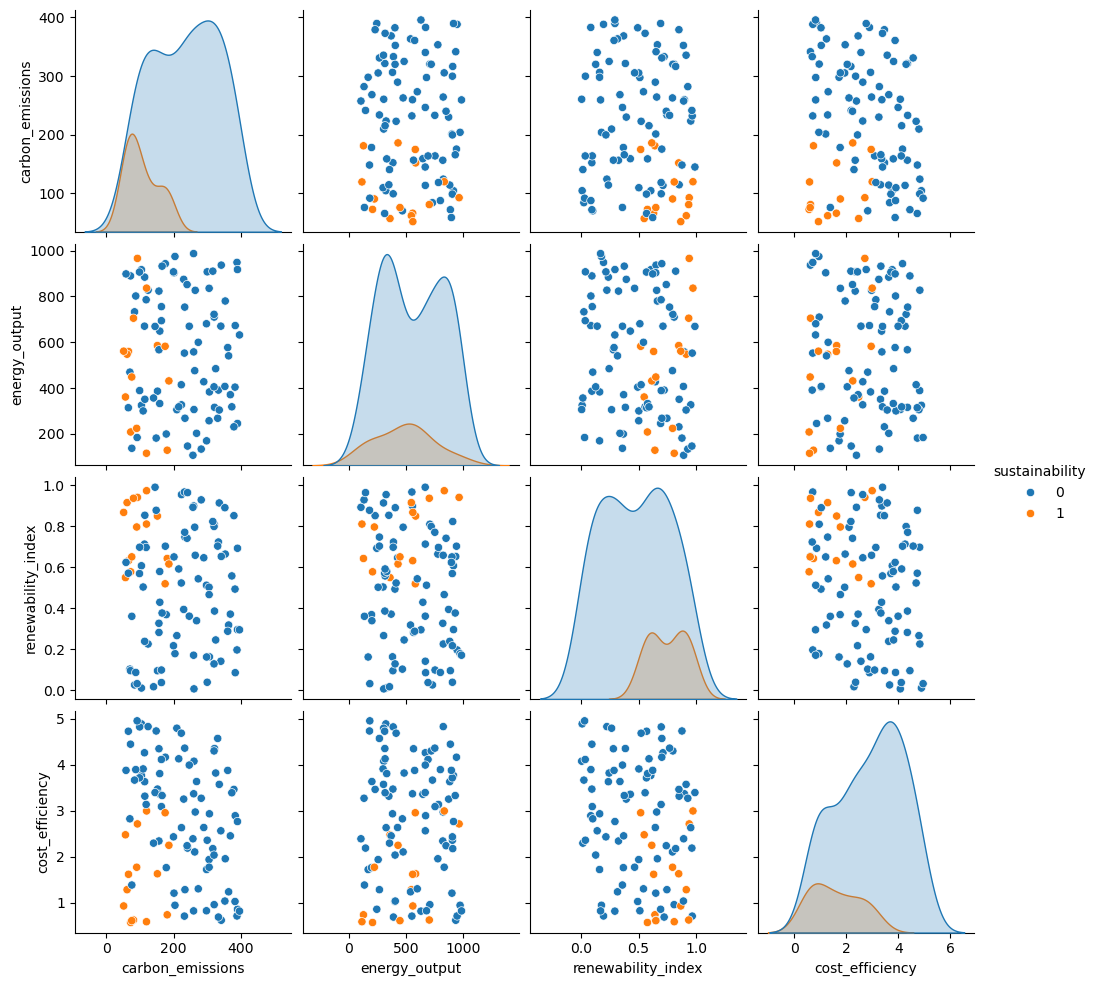

In [50]:
import seaborn as sns 
temp=data
sns.pairplot(temp,hue='sustainability')
plt.show()

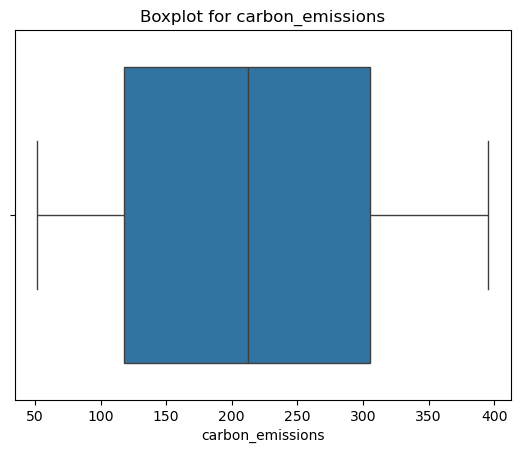

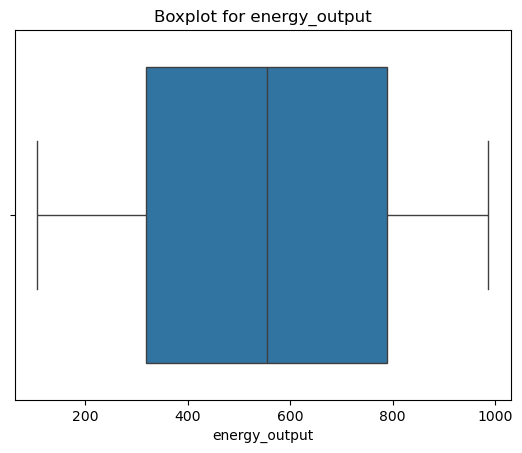

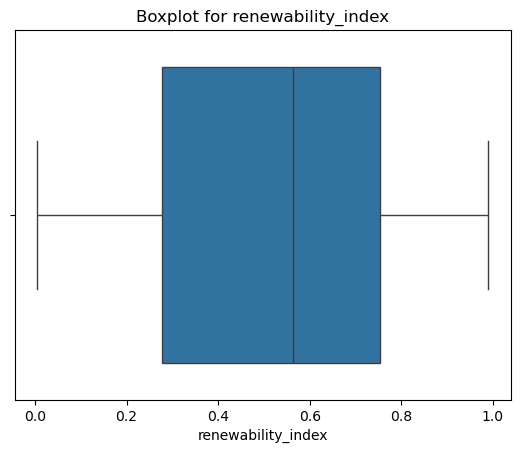

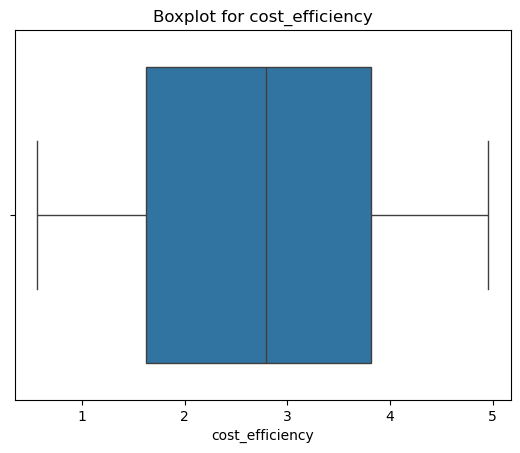

In [12]:
numeric_columns = ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']
for col in numeric_columns:
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()


In [13]:
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    carbon_emissions  energy_output  renewability_index  \
carbon_emissions            1.000000      -0.034033           -0.037654   
energy_output              -0.034033       1.000000           -0.146354   
renewability_index         -0.037654      -0.146354            1.000000   
cost_efficiency            -0.211882      -0.011783           -0.214816   
sustainability             -0.441912      -0.102749            0.336193   

                    cost_efficiency  sustainability  
carbon_emissions          -0.211882       -0.441912  
energy_output             -0.011783       -0.102749  
renewability_index        -0.214816        0.336193  
cost_efficiency            1.000000       -0.361310  
sustainability            -0.361310        1.000000  


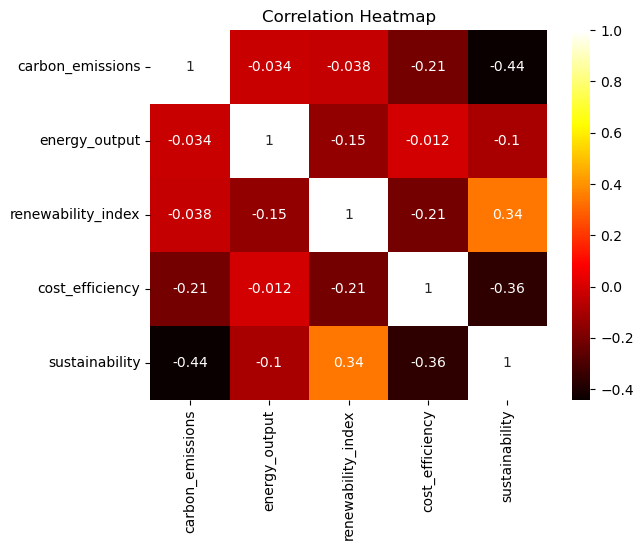

In [15]:
# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="hot")
plt.title("Correlation Heatmap")
plt.show()

Class Distribution:
 sustainability
0    85
1    15
Name: count, dtype: int64


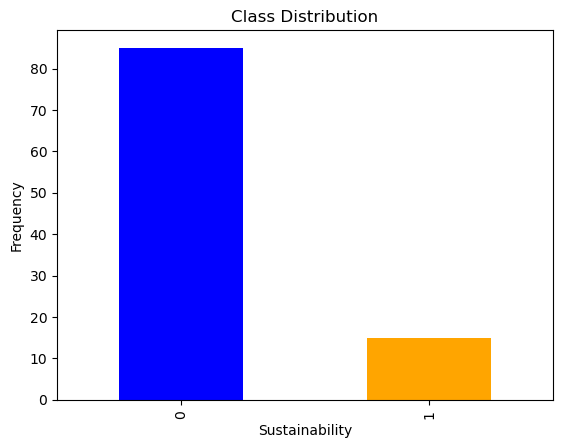

Imbalance Ratio: 0.18
Data is imbalanced.


In [33]:
# Count of each class
class_counts = data['sustainability'].value_counts()
print("Class Distribution:\n", class_counts)

# Plot class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Sustainability')
plt.ylabel('Frequency')
plt.show()

# Check balance threshold
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio < 0.5:
    print("Data is imbalanced.")
else:
    print("Data is balanced.")

In [34]:
# Example feature selection
X=data[ ['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y=data['sustainability']

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
y_pred=model.predict(X_test)

In [38]:
#Accuracy Score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 0.95


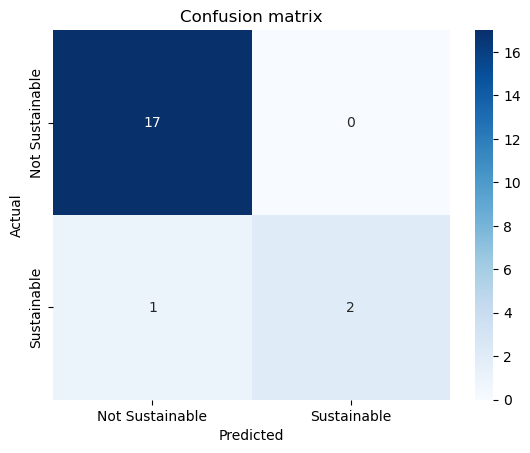

In [39]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Sustainable', 'Sustainable'],
           yticklabels=['Not Sustainable', 'Sustainable'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [40]:
#Classification Report
print(classification_report(y_test,y_pred,target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [41]:
# Feauture importance
coefficients = pd.DataFrame(model.coef_.T,index=X.columns,columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


In [42]:
import joblib
# Save the model to a file
joblib.dump(model, 'lrmodel_sustainable.pkl')

['lrmodel_sustainable.pkl']

In [43]:
# load the model
model=joblib.load('lrmodel_sustainable.pkl')

In [44]:
temp=np.array([[22,49]])

In [53]:
import numpy as np
# Assuming 'model' is your trained model
new_data = np.array([[22.49,25, 0.85, 0.72,]])  # Example values for carbon_emissions, renewability_index, cost_efficiency
predictions = model.predict(new_data)
print("Output:",predictions)
if predictions==1:
    print("Sustainable")
else:
    print("Non-Sustainable")


Output: [1]
Sustainable


C:\Users\kgadg\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
